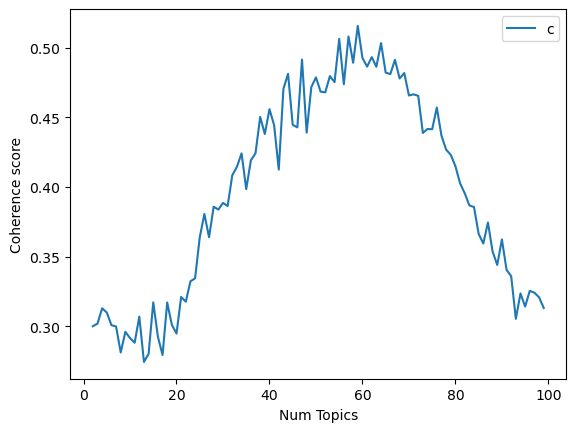

Num Topics = 2  has Coherence Value of 0.3001
Num Topics = 3  has Coherence Value of 0.302
Num Topics = 4  has Coherence Value of 0.313
Num Topics = 5  has Coherence Value of 0.31
Num Topics = 6  has Coherence Value of 0.3009
Num Topics = 7  has Coherence Value of 0.3
Num Topics = 8  has Coherence Value of 0.2813
Num Topics = 9  has Coherence Value of 0.2961
Num Topics = 10  has Coherence Value of 0.2916
Num Topics = 11  has Coherence Value of 0.2883
Num Topics = 12  has Coherence Value of 0.307
Num Topics = 13  has Coherence Value of 0.2745
Num Topics = 14  has Coherence Value of 0.2803
Num Topics = 15  has Coherence Value of 0.3173
Num Topics = 16  has Coherence Value of 0.2926
Num Topics = 17  has Coherence Value of 0.2795
Num Topics = 18  has Coherence Value of 0.3172
Num Topics = 19  has Coherence Value of 0.3012
Num Topics = 20  has Coherence Value of 0.2949
Num Topics = 21  has Coherence Value of 0.3211
Num Topics = 22  has Coherence Value of 0.3177
Num Topics = 23  has Coherenc

In [1]:
import numpy as np
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import spacy
from nltk.corpus import stopwords
  
# Define stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


# Load data and preprocess if necessary
tweet_df = pd.read_csv('C:/Users/dq22603/Downloads/new_data_with_column_names.csv')
data = tweet_df["Text"].iloc[-40000:]  # Select the last 30,000 rows

# Tokenization
data_words = [gensim.utils.simple_preprocess(str(sent), deacc=True) for sent in data]

# Define the lemmatization function
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Create bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove stopwords and form bigrams
data_words_nostops = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops]

# Lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary and Corpus
id2word = gensim.corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Find the optimal number of topics
start, limit, step = 2, 100, 1  # You can adjust these parameters
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

# Plot the coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


C:\Users\dq22603\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


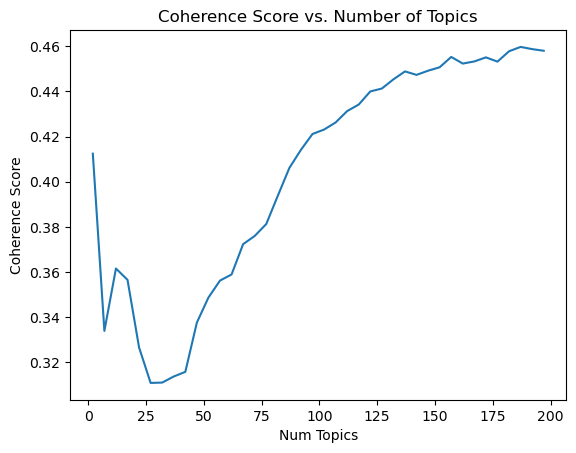

Num Topics = 2  has Coherence Value of 0.4124
Num Topics = 7  has Coherence Value of 0.3339
Num Topics = 12  has Coherence Value of 0.3615
Num Topics = 17  has Coherence Value of 0.3565
Num Topics = 22  has Coherence Value of 0.3265
Num Topics = 27  has Coherence Value of 0.3108
Num Topics = 32  has Coherence Value of 0.311
Num Topics = 37  has Coherence Value of 0.3137
Num Topics = 42  has Coherence Value of 0.3157
Num Topics = 47  has Coherence Value of 0.3376
Num Topics = 52  has Coherence Value of 0.3487
Num Topics = 57  has Coherence Value of 0.3562
Num Topics = 62  has Coherence Value of 0.3589
Num Topics = 67  has Coherence Value of 0.3723
Num Topics = 72  has Coherence Value of 0.3759
Num Topics = 77  has Coherence Value of 0.3812
Num Topics = 82  has Coherence Value of 0.3938
Num Topics = 87  has Coherence Value of 0.4061
Num Topics = 92  has Coherence Value of 0.4141
Num Topics = 97  has Coherence Value of 0.4211
Num Topics = 102  has Coherence Value of 0.4231
Num Topics = 10

In [19]:
import numpy as np
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import random
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import spacy
from nltk.corpus import stopwords

# Define stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Load data and preprocess if necessary
tweet_df = pd.read_csv('C:/Users/dq22603/Downloads/new_data_with_column_names.csv')
data = tweet_df["Text"].iloc[-40000:]  # Select the last 40,000 rows

# Randomly select a subset of your data
sample_size = 10000  # Adjust the sample size as needed
data = random.sample(data.tolist(), sample_size)

# Tokenization
data_words = [gensim.utils.simple_preprocess(str(sent), deacc=True) for sent in data]

# Define the lemmatization function
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Create bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove stopwords and form bigrams
data_words_nostops = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]
data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops]

# Lemmatization
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(doc) for doc in data_lemmatized])

# Function to compute coherence scores for different numbers of topics
def compute_coherence_values(tfidf_matrix, data_lemmatized, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = NMF(n_components=num_topics, init='nndsvd', random_state=1)
        W = model.fit_transform(tfidf_matrix)
        H = model.components_
        model_list.append(model)
        
        # Calculate the top words for each topic
        top_words_per_topic = []
        feature_names = tfidf_vectorizer.get_feature_names_out()
        for topic_weights in H:
            top_words = [feature_names[i] for i in topic_weights.argsort()[:-10 - 1:-1]]
            top_words_per_topic.append(top_words)
        
        # Calculate coherence score using Gensim's CoherenceModel
        coherence_model = CoherenceModel(topics=top_words_per_topic, texts=data_lemmatized, dictionary=gensim.corpora.Dictionary(data_lemmatized), coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_values.append(coherence_score)
    
    return model_list, coherence_values

# Find the optimal number of topics
start, limit, step = 2, 200, 5  # Adjust these parameters as needed
model_list, coherence_values = compute_coherence_values(tfidf_matrix, data_lemmatized, start=start, limit=limit, step=step)

# Plot the coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
